In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import pyedflib
import seaborn as sns
import statsmodels.api as sm
import mne
from scipy.signal import spectrogram

In [2]:
data = pd.read_csv(r"C:\Users\nico_\Desktop\INSERM\Projet ICEO\Recueil_ICEO_final.csv", sep=';', encoding='ISO-8859-1')

In [3]:
data.columns

Index(['Patient', 'Âge', 'Sexe ', 'IMC', 'ASA', 'HTA', 'Diabète', 'Tabac',
       'AC/FA', 'AVC/AIT', 'Epilepsie', 'Troubles cognitifs',
       'Douleurs chroniques', 'OH/toxicomanie', 'Cancer', 'Asthme',
       'Dose bolus PROPOFOL induction', 'KETAMINE ', 'CURARE',
       'Burst-suppression '],
      dtype='object')

In [4]:
data.shape

(85, 20)

In [22]:
data2 = pd.read_csv(r"C:\Users\nico_\Desktop\INSERM\Projet ICEO\Recueil_ICEO_26012022_2.csv", sep=';', encoding='ISO-8859-1')

In [11]:
data_puissance = pd.read_csv(r"C:\Users\nico_\Desktop\INSERM\Projet ICEO\puissances_SEF95_2_csv.csv", sep=';', encoding='ISO-8859-1')
data_puissance["Delta SEF95"] = data_puissance["SEF95 ap ket"] - data_puissance["SEF95 av ket"]
data_puissance['Delta Delta'] = data_puissance['P Delta ap ket'] - data_puissance['P Delta av ket']
data_puissance['Delta Thêta'] = data_puissance['P Thêta ap ket'] - data_puissance['P Thêta av ket']
data_puissance['Delta Alpha'] = data_puissance['P Alpha ap ket'] - data_puissance['P Alpha av ket']
data_puissance["Bêta activation"] = data_puissance["P Bêta ap ket"] - data_puissance["P Bêta av ket"]      
data_puissance['Delta Gamma'] = data_puissance['P Gamma ap ket'] - data_puissance['P Gamma av ket']

In [12]:
data_puissance.shape

(44, 20)

In [13]:
data_Pmax = pd.read_csv(r"C:\Users\nico_\Desktop\INSERM\Projet ICEO\puissance alpha max csv.csv", sep=';', encoding='ISO-8859-1')

In [14]:
data_Pmax.shape

(45, 3)

In [15]:
data_Pmax_merged = pd.merge(data_puissance, data_Pmax, on='Patient', how='inner')

In [16]:
del data_Pmax_merged['Effet']

In [17]:
data_Pmax_merged.shape

(43, 21)

In [18]:
data_final = pd.merge(data, data_Pmax_merged, on='Patient', how='inner')

In [19]:
data_final.shape

(42, 40)

In [27]:
data_final['IMC'] = data_final['IMC'].str.replace(',', '.', regex=False).astype(float)

In [28]:
data_final['Activation'] = data_final['Bêta activation'].apply(lambda x: 0 if x < 0.5 else 1)

In [29]:
data_final.columns

Index(['Patient', 'Âge', 'Sexe ', 'IMC', 'ASA', 'HTA', 'Diabète', 'Tabac',
       'AC/FA', 'AVC/AIT', 'Epilepsie', 'Troubles cognitifs',
       'Douleurs chroniques', 'OH/toxicomanie', 'Cancer', 'Asthme',
       'Dose bolus PROPOFOL induction', 'KETAMINE ', 'CURARE',
       'Burst-suppression ', 'SEF95 av ket', 'SEF95 ap ket', 'P Delta av ket',
       'P Delta ap ket', 'P Thêta av ket', 'P Thêta ap ket', 'P Alpha av ket',
       'P Alpha ap ket', 'P Bêta av ket', 'P Bêta ap ket', 'P Gamma av ket',
       'P Gamma ap ket', 'Delta SEF95', 'Delta Delta', 'Delta Thêta',
       'Delta Alpha', 'Bêta activation', 'Delta Gamma', 'P Alpha Max',
       'P Bêta Max', 'Activation'],
      dtype='object')

# Tableau 2

In [283]:
data_final['Burst-suppression '].value_counts()

1             21
0             20
Pas d' EEG     1
Name: Burst-suppression , dtype: int64

In [294]:
data_final['P Gamma av ket'].median()

0.02

In [295]:
data_final['P Gamma av ket'].describe()

count    42.000000
mean      0.033333
std       0.036202
min       0.010000
25%       0.010000
50%       0.020000
75%       0.040000
max       0.190000
Name: P Gamma av ket, dtype: float64

In [316]:
data_final_tableau1 = data_final[['SEF95 av ket', 'SEF95 ap ket', 'P Delta av ket',
       'P Delta ap ket', 'P Thêta av ket', 'P Thêta ap ket', 'P Alpha av ket',
       'P Alpha ap ket', 'P Bêta av ket', 'P Bêta ap ket', 'P Gamma av ket',
       'P Gamma ap ket']]

In [317]:
data_final_tableau1.median()

SEF95 av ket      11.790
SEF95 ap ket      14.615
P Delta av ket    51.785
P Delta ap ket    42.415
P Thêta av ket     6.360
P Thêta ap ket     6.275
P Alpha av ket     5.630
P Alpha ap ket     5.520
P Bêta av ket      0.810
P Bêta ap ket      1.290
P Gamma av ket     0.020
P Gamma ap ket     0.030
dtype: float64

In [319]:
data_final_tableau1.describe()

,SEF95 av ket,SEF95 ap ket,P Delta av ket,P Delta ap ket,P Thêta av ket,P Thêta ap ket,P Alpha av ket,P Alpha ap ket,P Bêta av ket,P Bêta ap ket,P Gamma av ket,P Gamma ap ket
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,11.541429,14.330476,114.855952,112.456190,9.505476,8.878571,8.602143,7.221905,1.143571,2.343095,0.033333,0.061905
std,3.197499,4.666168,220.073577,232.730481,9.923094,8.393128,11.315975,5.403616,1.064525,3.559539,0.036202,0.101483
min,2.700000,3.480000,5.630000,7.220000,0.980000,0.970000,0.960000,0.980000,0.170000,0.240000,0.010000,0.010000
25%,9.940000,11.920000,29.325000,15.785000,2.842500,2.990000,3.245000,2.997500,0.542500,0.822500,0.010000,0.020000
50%,11.790000,14.615000,51.785000,42.415000,6.360000,6.275000,5.630000,5.520000,0.810000,1.290000,0.020000,0.030000
75%,13.767500,17.287500,95.962500,86.187500,11.532500,10.405000,8.930000,9.257500,1.342500,2.390000,0.040000,0.060000
max,17.400000,22.620000,1080.920000,1099.960000,48.940000,36.130000,70.840000,19.480000,5.630000,21.680000,0.190000,0.590000


# Groupes

In [794]:
group_0 = data_final[data_final['Activation'] == 0]
group_1 = data_final[data_final['Activation'] == 1]

In [386]:
data_final['CURARE'].value_counts()

1    27
0    15
Name: CURARE, dtype: int64

In [400]:
group_1.columns

Index(['Patient', 'Âge', 'Sexe ', 'IMC', 'ASA', 'HTA', 'Diabète', 'Tabac',
       'AC/FA', 'AVC/AIT', 'Epilepsie', 'Troubles cognitifs',
       'Douleurs chroniques', 'OH/toxicomanie', 'Cancer', 'Asthme',
       'Dose bolus PROPOFOL induction', 'KETAMINE ', 'CURARE',
       'Burst-suppression ', 'SEF95 av ket', 'SEF95 ap ket', 'P Delta av ket',
       'P Delta ap ket', 'P Thêta av ket', 'P Thêta ap ket', 'P Alpha av ket',
       'P Alpha ap ket', 'P Bêta av ket', 'P Bêta ap ket', 'P Gamma av ket',
       'P Gamma ap ket', 'Delta SEF95', 'Delta Delta', 'Delta Thêta',
       'Delta Alpha', 'Bêta activation', 'Delta Gamma', 'P Alpha Max',
       'P Bêta Max', 'Activation'],
      dtype='object')

In [405]:
group_0['P Alpha Max'].value_counts()

1             12
0              8
Pas d' EEG     1
Name: Burst-suppression , dtype: int64

In [456]:
data_final['P Bêta Max'].median()

-0.7

In [457]:
data_final['P Bêta Max'].describe()

count    42.000000
mean     -0.101429
std       3.312974
min      -6.370000
25%      -1.677500
50%      -0.700000
75%       1.922500
max       7.420000
Name: P Bêta Max, dtype: float64

In [460]:
group_0['P Bêta Max'].median()

-1.53

In [461]:
group_0['P Bêta Max'].describe()

count    21.000000
mean     -1.363810
std       3.080488
min      -6.370000
25%      -3.350000
50%      -1.530000
75%      -0.770000
max       6.130000
Name: P Bêta Max, dtype: float64

# Test Khi-2

In [437]:
target_variable = 'Activation'

categorical_columns = ['Sexe ', 'ASA', 'HTA', 'Diabète', 'Tabac',
       'AC/FA', 'AVC/AIT', 'Epilepsie', 'Troubles cognitifs',
       'Douleurs chroniques', 'OH/toxicomanie', 'Cancer', 'Asthme',
       'Burst-suppression ']

chi2_results = {}

for column in categorical_columns:

    table = pd.crosstab(data_final[column], data_final['Activation'])
    
# Calcul du test du chi2 avec correction de Yates
    chi2_yates, p_yates, dof_yates, expected_yates = chi2_contingency(table, correction=True)

# Calcul du test du chi2 avec méthode de Pearson
    chi2_pearson, p_pearson, dof_pearson, expected_pearson = chi2_contingency(table)

    
# Stockez les résultats dans le dictionnaire
    chi2_results[column] = {
        'Chi2_Yates': chi2_yates,
        'p-value_Yates': p_yates,
        'Chi2_Pearson': chi2_pearson,
        'p-value_Pearson': p_pearson
    }


# Affichez les résultats
for column, result in chi2_results.items():
    print(f"Variable catégorielle: {column}")
    print(f"Chi2 (Yates): {result['Chi2_Yates']}")
    print(f"P-value (Yates): {result['p-value_Yates']}")
    print(f"Chi2 (Pearson): {result['Chi2_Pearson']}")
    print(f"P-value (Pearson): {result['p-value_Pearson']}")
    print("------")

Variable catégorielle: Sexe 
Chi2 (Yates): 0.38095238095238093
P-value (Yates): 0.5370939784426414
Chi2 (Pearson): 0.38095238095238093
P-value (Pearson): 0.5370939784426414
------
Variable catégorielle: ASA
Chi2 (Yates): 1.04
P-value (Yates): 0.5945205479701944
Chi2 (Pearson): 1.04
P-value (Pearson): 0.5945205479701944
------
Variable catégorielle: HTA
Chi2 (Yates): 0.0
P-value (Yates): 1.0
Chi2 (Pearson): 0.0
P-value (Pearson): 1.0
------
Variable catégorielle: Diabète
Chi2 (Yates): 0.0
P-value (Yates): 1.0
Chi2 (Pearson): 0.0
P-value (Pearson): 1.0
------
Variable catégorielle: Tabac
Chi2 (Yates): 0.9081081081081082
P-value (Yates): 0.3406168920980063
Chi2 (Pearson): 0.9081081081081082
P-value (Pearson): 0.3406168920980063
------
Variable catégorielle: AC/FA
Chi2 (Yates): 0.0
P-value (Yates): 1.0
Chi2 (Pearson): 0.0
P-value (Pearson): 1.0
------
Variable catégorielle: AVC/AIT
Chi2 (Yates): 0.0
P-value (Yates): 1.0
Chi2 (Pearson): 0.0
P-value (Pearson): 1.0
------
Variable catégoriell

# Test Shapiro

In [438]:
data_final.columns

Index(['Âge', 'Sexe ', 'IMC', 'ASA', 'HTA', 'Diabète', 'Tabac', 'AC/FA',
       'AVC/AIT', 'Epilepsie', 'Troubles cognitifs', 'Douleurs chroniques',
       'OH/toxicomanie', 'Cancer', 'Asthme', 'Dose bolus PROPOFOL induction',
       'KETAMINE ', 'CURARE', 'Burst-suppression ', 'SEF95 av ket',
       'SEF95 ap ket', 'P Delta av ket', 'P Delta ap ket', 'P Thêta av ket',
       'P Thêta ap ket', 'P Alpha av ket', 'P Alpha ap ket', 'P Bêta av ket',
       'P Bêta ap ket', 'P Gamma av ket', 'P Gamma ap ket', 'Delta SEF95',
       'Delta Delta', 'Delta Thêta', 'Delta Alpha', 'Bêta activation',
       'Delta Gamma', 'P Alpha Max', 'P Bêta Max', 'Activation'],
      dtype='object')

In [444]:
variable_names = ['Âge', 'IMC', 'Dose bolus PROPOFOL induction', 'KETAMINE ', 'CURARE',
                  'SEF95 av ket', 'P Delta av ket', 'P Thêta av ket' , 'P Alpha av ket',
                  'P Bêta av ket', 'P Gamma av ket', 'P Alpha Max', 'P Bêta Max']

for variable_name in variable_names:
    _, p_value = stats.shapiro(data_final[variable_name])
    
    alpha = 0.05
    if p_value > alpha:
        print(f"La variable {variable_name} suit une distribution normale (p-value = {p_value})")
    else:
        print(f"La variable {variable_name} ne suit pas une distribution normale (p-value = {p_value})")


La variable Âge suit une distribution normale (p-value = 0.08816807717084885)
La variable IMC ne suit pas une distribution normale (p-value = 0.0009516182471998036)
La variable Dose bolus PROPOFOL induction ne suit pas une distribution normale (p-value = 0.0009812591597437859)
La variable KETAMINE  ne suit pas une distribution normale (p-value = 6.238959485926898e-06)
La variable CURARE ne suit pas une distribution normale (p-value = 2.17724194229163e-09)
La variable SEF95 av ket suit une distribution normale (p-value = 0.38396990299224854)
La variable P Delta av ket ne suit pas une distribution normale (p-value = 1.607633817735099e-11)
La variable P Thêta av ket ne suit pas une distribution normale (p-value = 6.075014198358986e-07)
La variable P Alpha av ket ne suit pas une distribution normale (p-value = 1.8803919532572877e-10)
La variable P Bêta av ket ne suit pas une distribution normale (p-value = 1.9125815242659883e-07)
La variable P Gamma av ket ne suit pas une distribution norm

In [445]:
data_final.columns

Index(['Âge', 'Sexe ', 'IMC', 'ASA', 'HTA', 'Diabète', 'Tabac', 'AC/FA',
       'AVC/AIT', 'Epilepsie', 'Troubles cognitifs', 'Douleurs chroniques',
       'OH/toxicomanie', 'Cancer', 'Asthme', 'Dose bolus PROPOFOL induction',
       'KETAMINE ', 'CURARE', 'Burst-suppression ', 'SEF95 av ket',
       'SEF95 ap ket', 'P Delta av ket', 'P Delta ap ket', 'P Thêta av ket',
       'P Thêta ap ket', 'P Alpha av ket', 'P Alpha ap ket', 'P Bêta av ket',
       'P Bêta ap ket', 'P Gamma av ket', 'P Gamma ap ket', 'Delta SEF95',
       'Delta Delta', 'Delta Thêta', 'Delta Alpha', 'Bêta activation',
       'Delta Gamma', 'P Alpha Max', 'P Bêta Max', 'Activation'],
      dtype='object')

In [446]:
distribution_normale = ['Âge', 'SEF95 av ket', 'P Alpha Max', 'P Bêta Max']
distribution_non_normale = ['IMC', 'Dose bolus PROPOFOL induction', 'KETAMINE ', 'CURARE', 
                            'P Delta av ket', 'P Thêta av ket', 'P Alpha av ket', 'P Bêta av ket',
                            'P Gamma av ket']

In [449]:
alpha = 0.05  

# Test de Student (t-test) pour les variables à distribution normale
for variable_name in distribution_normale:
    group1 = data_final[data_final['Activation'] == 1][variable_name]
    group0 = data_final[data_final['Activation'] == 0][variable_name]
    
    t_statistic, p_value = stats.ttest_ind(group1, group0)
    
    if p_value < alpha:
        print(f"Le test de Student indique une différence significative pour {variable_name} (p-value = {p_value})")
    else:
        print(f"Le test de Student n'indique pas de différence significative pour {variable_name} (p-value = {p_value})")

# Test de Mann-Whitney U pour les variables à distribution non normale
for variable_name in distribution_non_normale:
    group1 = data_final[data_final['Activation'] == 1][variable_name]
    group0 = data_final[data_final['Activation'] == 0][variable_name]
    
    _, p_value = stats.mannwhitneyu(group1, group0)
    
    if p_value < alpha:
        print(f"Le test de Mann-Whitney U indique une différence significative pour {variable_name} (p-value = {p_value})")
    else:
        print(f"Le test de Mann-Whitney U n'indique pas de différence significative pour {variable_name} (p-value = {p_value})")


Le test de Student indique une différence significative pour Âge (p-value = 0.03724456746844016)
Le test de Student n'indique pas de différence significative pour SEF95 av ket (p-value = 0.18264363388030486)
Le test de Student indique une différence significative pour P Alpha Max (p-value = 0.0037320506732743987)
Le test de Student indique une différence significative pour P Bêta Max (p-value = 0.011657048193479767)
Le test de Mann-Whitney U n'indique pas de différence significative pour IMC (p-value = 0.6506903704105349)
Le test de Mann-Whitney U n'indique pas de différence significative pour Dose bolus PROPOFOL induction (p-value = 0.8592947370702124)
Le test de Mann-Whitney U n'indique pas de différence significative pour KETAMINE  (p-value = 0.7538032403785206)
Le test de Mann-Whitney U n'indique pas de différence significative pour CURARE (p-value = 0.7618725866868916)
Le test de Mann-Whitney U n'indique pas de différence significative pour P Delta av ket (p-value = 0.118841220946

# Vérification p-value loi normale

In [796]:
alpha = 0.05

variables = ['Âge', 'SEF95 av ket', 'P Alpha Max', 'P Bêta Max']

for variable_name in variables:
    group1 = data_final[data_final['Activation'] == 1][variable_name]
    group0 = data_final[data_final['Activation'] == 0][variable_name]

    _, p_value = stats.mannwhitneyu(group1, group0)
    
    if p_value < alpha:
        print(f"Le test de Mann-Whitney U indique une différence significative pour {variable_name} (p-value = {p_value})")
    else:
        print(f"Le test de Mann-Whitney U n'indique pas de différence significative pour {variable_name} (p-value = {p_value})")

Le test de Mann-Whitney U indique une différence significative pour Âge (p-value = 0.04534686540498735)
Le test de Mann-Whitney U n'indique pas de différence significative pour SEF95 av ket (p-value = 0.1587993496645287)
Le test de Mann-Whitney U indique une différence significative pour P Alpha Max (p-value = 0.007953484114362181)
Le test de Mann-Whitney U indique une différence significative pour P Bêta Max (p-value = 0.00502844292055263)


# Tableau 1

In [485]:
data_final['P Gamma ap ket'].median()

0.03

In [486]:
data_final['P Gamma ap ket'].describe()

count    42.000000
mean      0.061905
std       0.101483
min       0.010000
25%       0.020000
50%       0.030000
75%       0.060000
max       0.590000
Name: P Gamma ap ket, dtype: float64

In [487]:
variable_names = [ 'SEF95 av ket', 'SEF95 ap ket', 'P Delta av ket', 'P Delta ap ket', 'P Thêta av ket', 
                  'P Thêta ap ket', 'P Alpha av ket', 'P Alpha ap ket','P Bêta av ket', 'P Bêta ap ket', 
                  'P Gamma av ket', 'P Gamma ap ket']

 
for variable_name in variable_names:
    
    _, p_value = stats.shapiro(data_final[variable_name])
    
    alpha = 0.05
    if p_value > alpha:
        print(f"La variable {variable_name} suit une distribution normale (p-value = {p_value})")
    else:
        print(f"La variable {variable_name} ne suit pas une distribution normale (p-value = {p_value})")

La variable SEF95 av ket suit une distribution normale (p-value = 0.38396990299224854)
La variable SEF95 ap ket suit une distribution normale (p-value = 0.21201053261756897)
La variable P Delta av ket ne suit pas une distribution normale (p-value = 1.607633817735099e-11)
La variable P Delta ap ket ne suit pas une distribution normale (p-value = 1.6485181275616156e-11)
La variable P Thêta av ket ne suit pas une distribution normale (p-value = 6.075014198358986e-07)
La variable P Thêta ap ket ne suit pas une distribution normale (p-value = 8.717801392776892e-06)
La variable P Alpha av ket ne suit pas une distribution normale (p-value = 1.8803919532572877e-10)
La variable P Alpha ap ket ne suit pas une distribution normale (p-value = 0.0006228011916391551)
La variable P Bêta av ket ne suit pas une distribution normale (p-value = 1.9125815242659883e-07)
La variable P Bêta ap ket ne suit pas une distribution normale (p-value = 5.518600507126159e-11)
La variable P Gamma av ket ne suit pas un

# Test Spearman

In [494]:
x = data_final['P Bêta av ket']
y = data_final['P Bêta ap ket']

# Effectuez le test de corrélation de Spearman
correlation_coefficient, p_value = stats.spearmanr(x, y)

# Affichez la p-value
print(f"P-value (corrélation de Spearman) : {p_value}")

P-value (corrélation de Spearman) : 2.8031895886007974e-18


# Test Pearson

In [488]:
x = data_final['SEF95 av ket']
y = data_final['SEF95 ap ket']

# Effectuez le test de corrélation de Pearson
correlation_coefficient, p_value = stats.pearsonr(x, y)

# Affichez la p-value
print(f"P-value (corrélation de Pearson) : {p_value}")

P-value (corrélation de Pearson) : 2.484609405857231e-14


# Tableau de corrélation

In [504]:
data_corr = data_final[['SEF95 av ket','P Thêta av ket','P Alpha av ket',
                        'P Bêta av ket', 'P Gamma av ket', 'P Alpha Max', 'P Bêta Max',
                        'P Alpha Max', 'P Bêta Max', 'Bêta activation']]

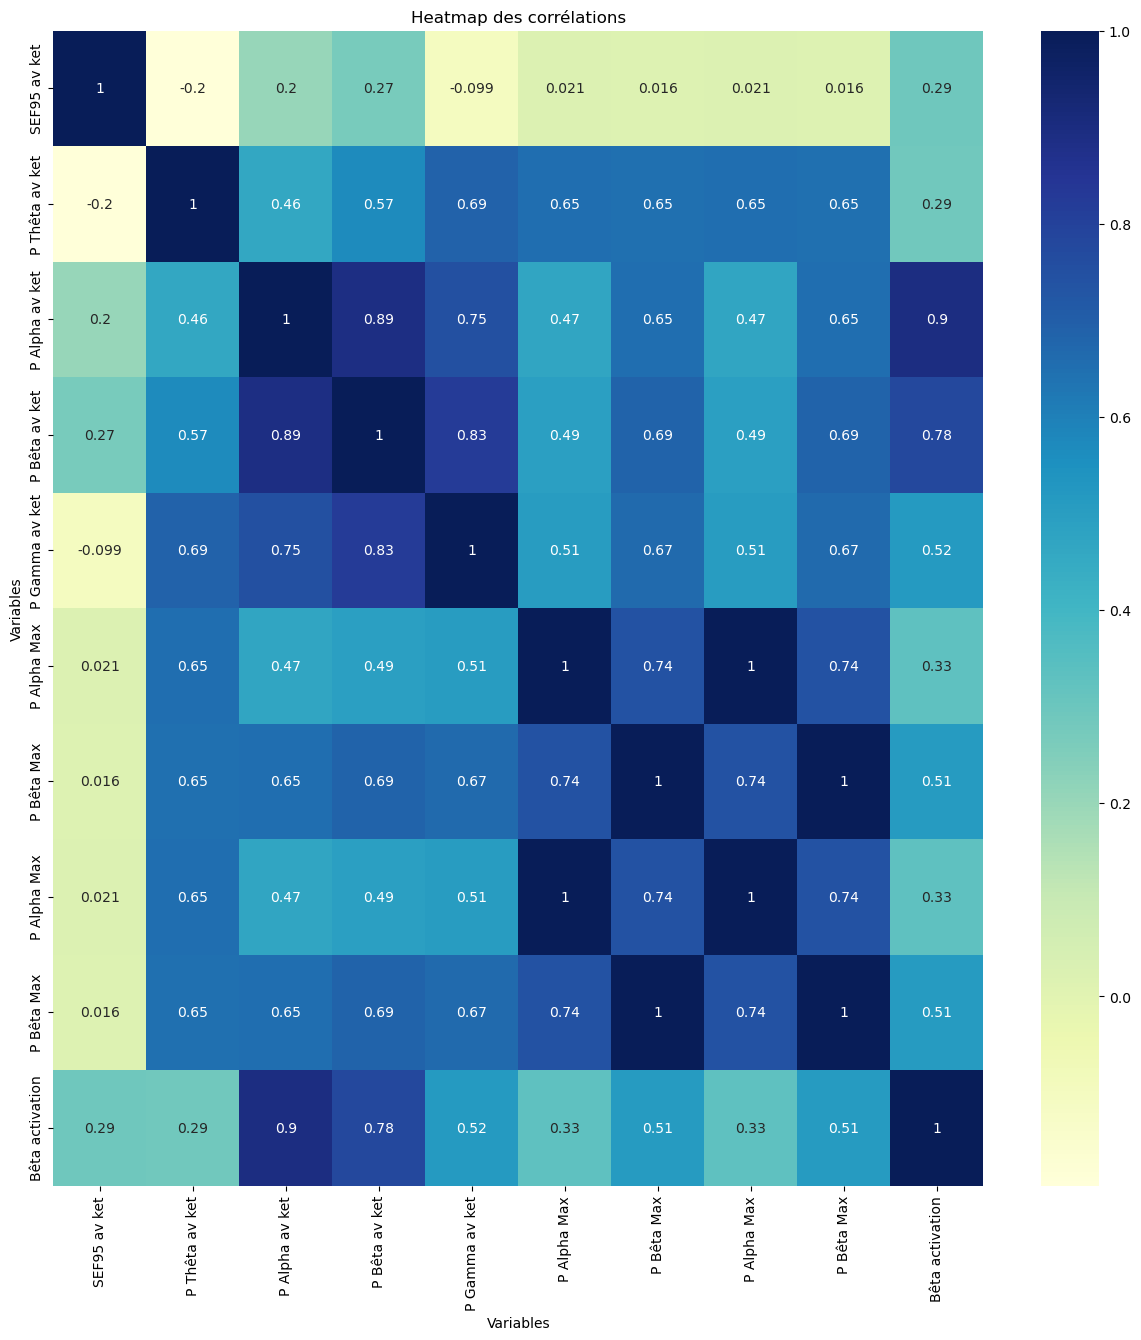

In [505]:
corr_matrix = data_corr.corr()

plt.figure(figsize=(15, 15))

sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

plt.title('Heatmap des corrélations')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

# Test student et Mann Whittney

In [506]:
groupe1 = ['P Delta av ket', 'P Delta ap ket', 'P Thêta av ket', 
           'P Thêta ap ket', 'P Alpha av ket', 'P Alpha ap ket','P Bêta av ket', 'P Bêta ap ket', 
           'P Gamma av ket', 'P Gamma ap ket']

In [517]:
_, p_value = stats.mannwhitneyu(data_final['P Gamma av ket'], data_final['P Gamma ap ket'])
print("p-value" , p_value)

p-value 0.023611244474923618


In [758]:
_, p_value = stats.mannwhitneyu(data_final['SEF95 av ket'], data_final['SEF95 ap ket'])
print("p-value" , p_value)

p-value 0.0008059564248612129


In [520]:
t_statistic, p_value = stats.ttest_ind(data_final["SEF95 av ket"], data_final["SEF95 ap ket"])
print("p-value", p_value)

p-value 0.0019829689887921453


# Ajout tableau 2

In [800]:
data_ajout = pd.read_csv(r"C:\Users\nico_\Desktop\INSERM\Projet ICEO\Recueil_ICEO_26012022_2.csv", sep=';', encoding='ISO-8859-1')

In [801]:
data = pd.read_csv(r"C:\Users\nico_\Desktop\INSERM\Projet ICEO\Recueil_ICEO_final.csv", sep=';', encoding='ISO-8859-1')

In [802]:
data_puissance = pd.read_csv(r"C:\Users\nico_\Desktop\INSERM\Projet ICEO\puissances_SEF95_2_csv.csv", sep=';', encoding='ISO-8859-1')
data_puissance["Delta SEF95"] = data_puissance["SEF95 ap ket"] - data_puissance["SEF95 av ket"]
data_puissance['Delta Delta'] = data_puissance['P Delta ap ket'] - data_puissance['P Delta av ket']
data_puissance['Delta Thêta'] = data_puissance['P Thêta ap ket'] - data_puissance['P Thêta av ket']
data_puissance['Delta Alpha'] = data_puissance['P Alpha ap ket'] - data_puissance['P Alpha av ket']
data_puissance["Bêta activation"] = data_puissance["P Bêta ap ket"] - data_puissance["P Bêta av ket"]      
data_puissance['Delta Gamma'] = data_puissance['P Gamma ap ket'] - data_puissance['P Gamma av ket']

In [803]:
data_Pmax_merged = pd.merge(data_puissance, data_Pmax, on='Patient', how='inner')

In [804]:
del data_Pmax_merged['Effet']

In [805]:
data_final = pd.merge(data, data_Pmax_merged, on='Patient', how='inner')

In [806]:
data_final['IMC'] = data_final['IMC'].str.replace(',', '.', regex=False).astype(float)

In [807]:
data_final['Activation'] = data_final['Bêta activation'].apply(lambda x: 0 if x < 0.5 else 1)

In [808]:
data_final.shape

(42, 41)

In [809]:
recueil_iceo = pd.read_csv(r"C:\Users\nico_\Desktop\INSERM\Recueil_ICEO_final.csv", sep=';', encoding='ISO-8859-1')

In [810]:
recueil_iceo.rename(columns={'NOM Prénom': 'Patient'}, inplace=True)

In [811]:
recueil_final = pd.merge(data_final, recueil_iceo, on='Patient', how='inner')

In [812]:
recueil_final['Dose AIVOC REMIFENTANIL induction '] = recueil_final['Dose AIVOC REMIFENTANIL induction '].str.replace(',', '.', regex=False).astype(float)
recueil_final['Entretien SEVOFLURANE Fet moyenne '] = recueil_final['Entretien SEVOFLURANE Fet moyenne '].str.replace(',', '.', regex=False).astype(float)

In [813]:
recueil_final['Dose AIVOC REMIFENTANIL induction '] = recueil_final['Dose AIVOC REMIFENTANIL induction '].astype(float)
recueil_final['Entretien SEVOFLURANE Fet moyenne '] = recueil_final['Entretien SEVOFLURANE Fet moyenne '].astype(float)

In [814]:
group_0 = recueil_final[data_final['Activation'] == 0]
group_1 = recueil_final[data_final['Activation'] == 1]

In [815]:
recueil_final.columns

Index(['Patient', 'Âge', 'Sexe ', 'IMC', 'ASA', 'HTA', 'Diabète', 'Tabac',
       'AC/FA', 'AVC/AIT', 'Epilepsie', 'Troubles cognitifs',
       'Douleurs chroniques', 'OH/toxicomanie', 'Cancer', 'Asthme',
       'Dose bolus PROPOFOL induction', 'KETAMINE ', 'CURARE',
       'Burst-suppression ', 'SEF95 av ket', 'SEF95 ap ket', 'P Delta av ket',
       'P Delta ap ket', 'P Thêta av ket', 'P Thêta ap ket', 'P Alpha av ket',
       'P Alpha ap ket', 'P Bêta av ket', 'P Bêta ap ket', 'P Gamma av ket',
       'P Gamma ap ket', 'Delta SEF95', 'Delta Delta', 'Delta Thêta',
       'Delta Alpha', 'Bêta activation', 'Delta Gamma', 'P Alpha Max',
       'P Bêta Max', 'Activation', 'Heure PROPOFOL induction',
       'Dose AIVOC REMIFENTANIL induction ', 'Heure REMIFENTANIL induction',
       'Heure KETAMINE', 'Entretien SEVOFLURANE Fet moyenne ',
       'Delai propofol_ketamine'],
      dtype='object')

In [816]:
recueil_final['Delai propofol_ketamine'].median()

33.0

In [817]:
recueil_final['Delai propofol_ketamine'].describe()

count     42.000000
mean      37.142857
std       18.012965
min       17.000000
25%       25.000000
50%       33.000000
75%       43.750000
max      115.000000
Name: Delai propofol_ketamine, dtype: float64

In [818]:
group_0['Delai propofol_ketamine'].median()

40.0

In [819]:
group_0['Delai propofol_ketamine'].describe()

count     21.000000
mean      43.523810
std       21.729287
min       17.000000
25%       31.000000
50%       40.000000
75%       52.000000
max      115.000000
Name: Delai propofol_ketamine, dtype: float64

In [820]:
variable_names = [ 'Dose AIVOC REMIFENTANIL induction ', 'Entretien SEVOFLURANE Fet moyenne ','Delai propofol_ketamine']

 
for variable_name in variable_names:
    
    _, p_value = stats.shapiro(recueil_final[variable_name])
    
    alpha = 0.05
    if p_value > alpha:
        print(f"La variable {variable_name} suit une distribution normale (p-value = {p_value})")
    else:
        print(f"La variable {variable_name} ne suit pas une distribution normale (p-value = {p_value})")


La variable Dose AIVOC REMIFENTANIL induction  ne suit pas une distribution normale (p-value = 0.00018239812925457954)
La variable Entretien SEVOFLURANE Fet moyenne  ne suit pas une distribution normale (p-value = 2.3277125364984386e-06)
La variable Delai propofol_ketamine ne suit pas une distribution normale (p-value = 7.731727237114683e-06)


In [821]:
_, p_value = stats.mannwhitneyu(recueil_final['P Gamma av ket'], data_final['P Gamma ap ket'])
print("p-value" , p_value)

p-value 0.023611244474923618


In [822]:
variable_names = [ 'Dose AIVOC REMIFENTANIL induction ', 'Entretien SEVOFLURANE Fet moyenne ','Delai propofol_ketamine']

alpha = 0.05  

for variable_name in variable_names:
    group1 = recueil_final[recueil_final['Activation'] == 1][variable_name]
    group0 = recueil_final[recueil_final['Activation'] == 0][variable_name]
    
    _, p_value = stats.mannwhitneyu(group1, group0)
    
    if p_value < alpha:
        print(f"Le test de Mann-Whitney U indique une différence significative pour {variable_name} (p-value = {p_value})")
    else:
        print(f"Le test de Mann-Whitney U n'indique pas de différence significative pour {variable_name} (p-value = {p_value})")

Le test de Mann-Whitney U n'indique pas de différence significative pour Dose AIVOC REMIFENTANIL induction  (p-value = 0.21907314266421496)
Le test de Mann-Whitney U n'indique pas de différence significative pour Entretien SEVOFLURANE Fet moyenne  (p-value = 0.4115439009133868)
Le test de Mann-Whitney U indique une différence significative pour Delai propofol_ketamine (p-value = 0.02341532247462404)


# Tableau corrélation

In [823]:
data_corr = recueil_final[['Âge','Delai propofol_ketamine','SEF95 av ket', 'P Delta av ket','P Thêta av ket','P Alpha av ket',
                        'P Bêta av ket', 'P Gamma av ket', 'P Alpha Max', 'P Bêta Max', 'Bêta activation']]

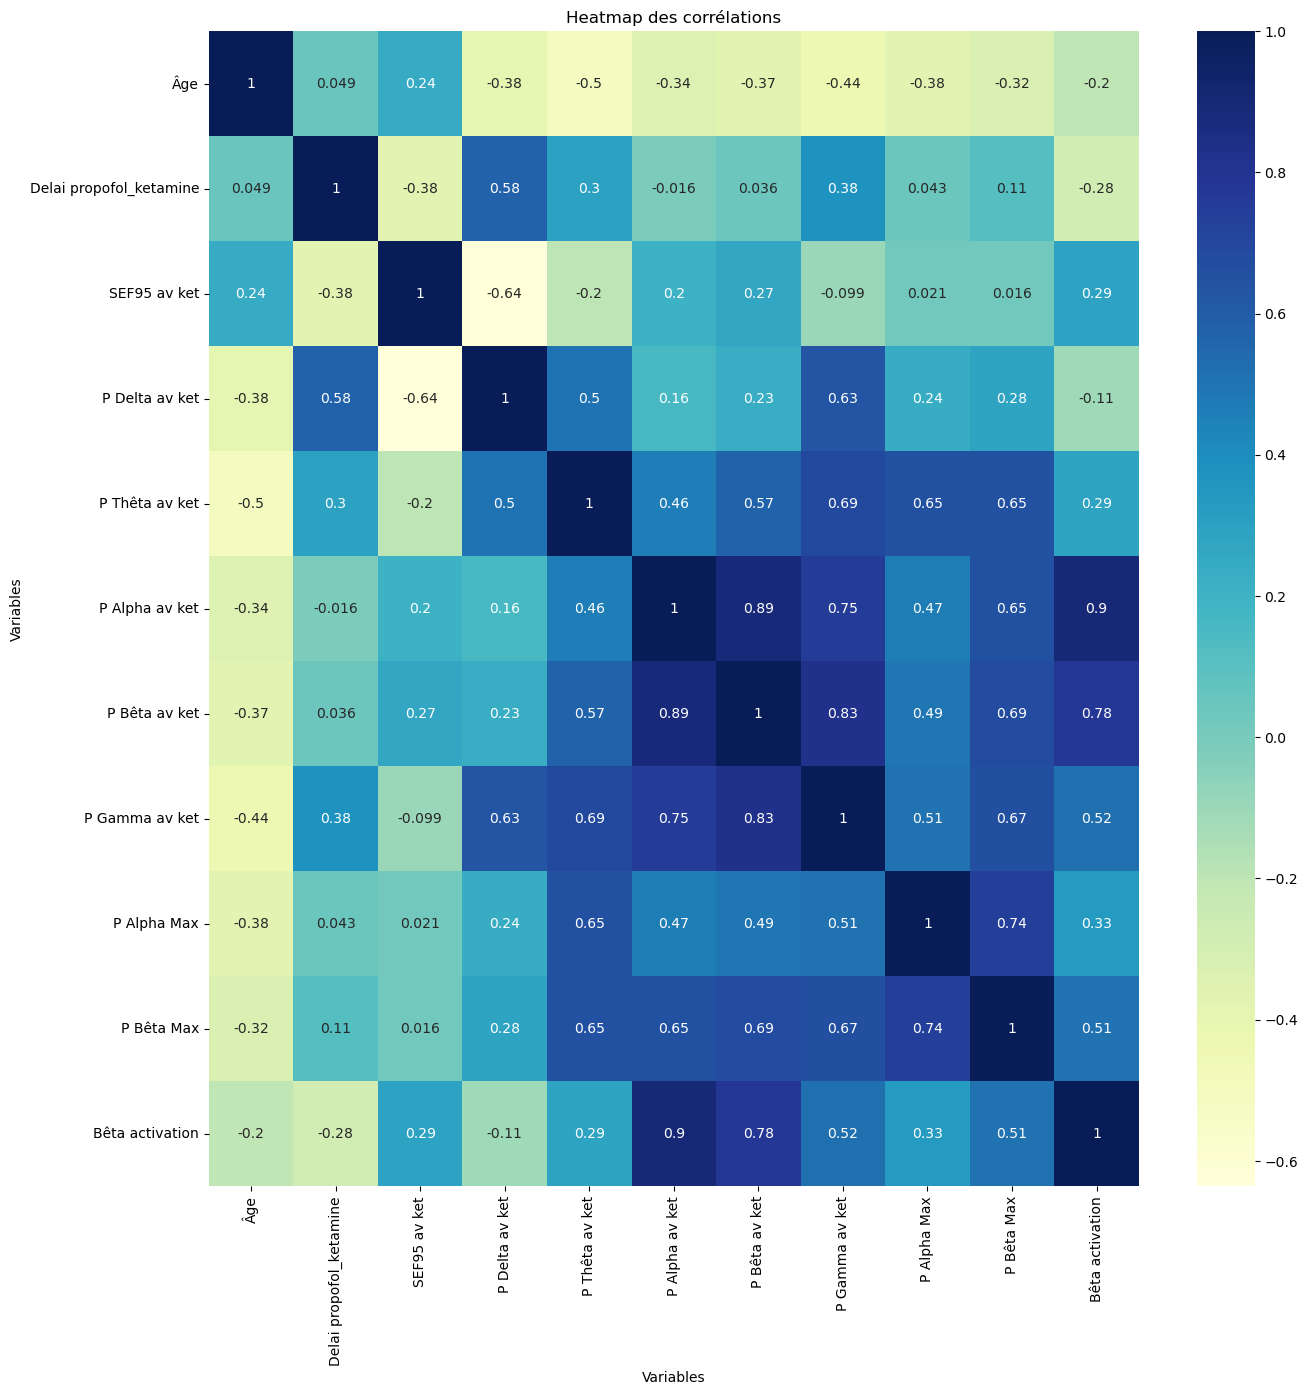

In [824]:
corr_matrix = data_corr.corr()

plt.figure(figsize=(15, 15))

sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

plt.title('Heatmap des corrélations')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

# Droite de régression

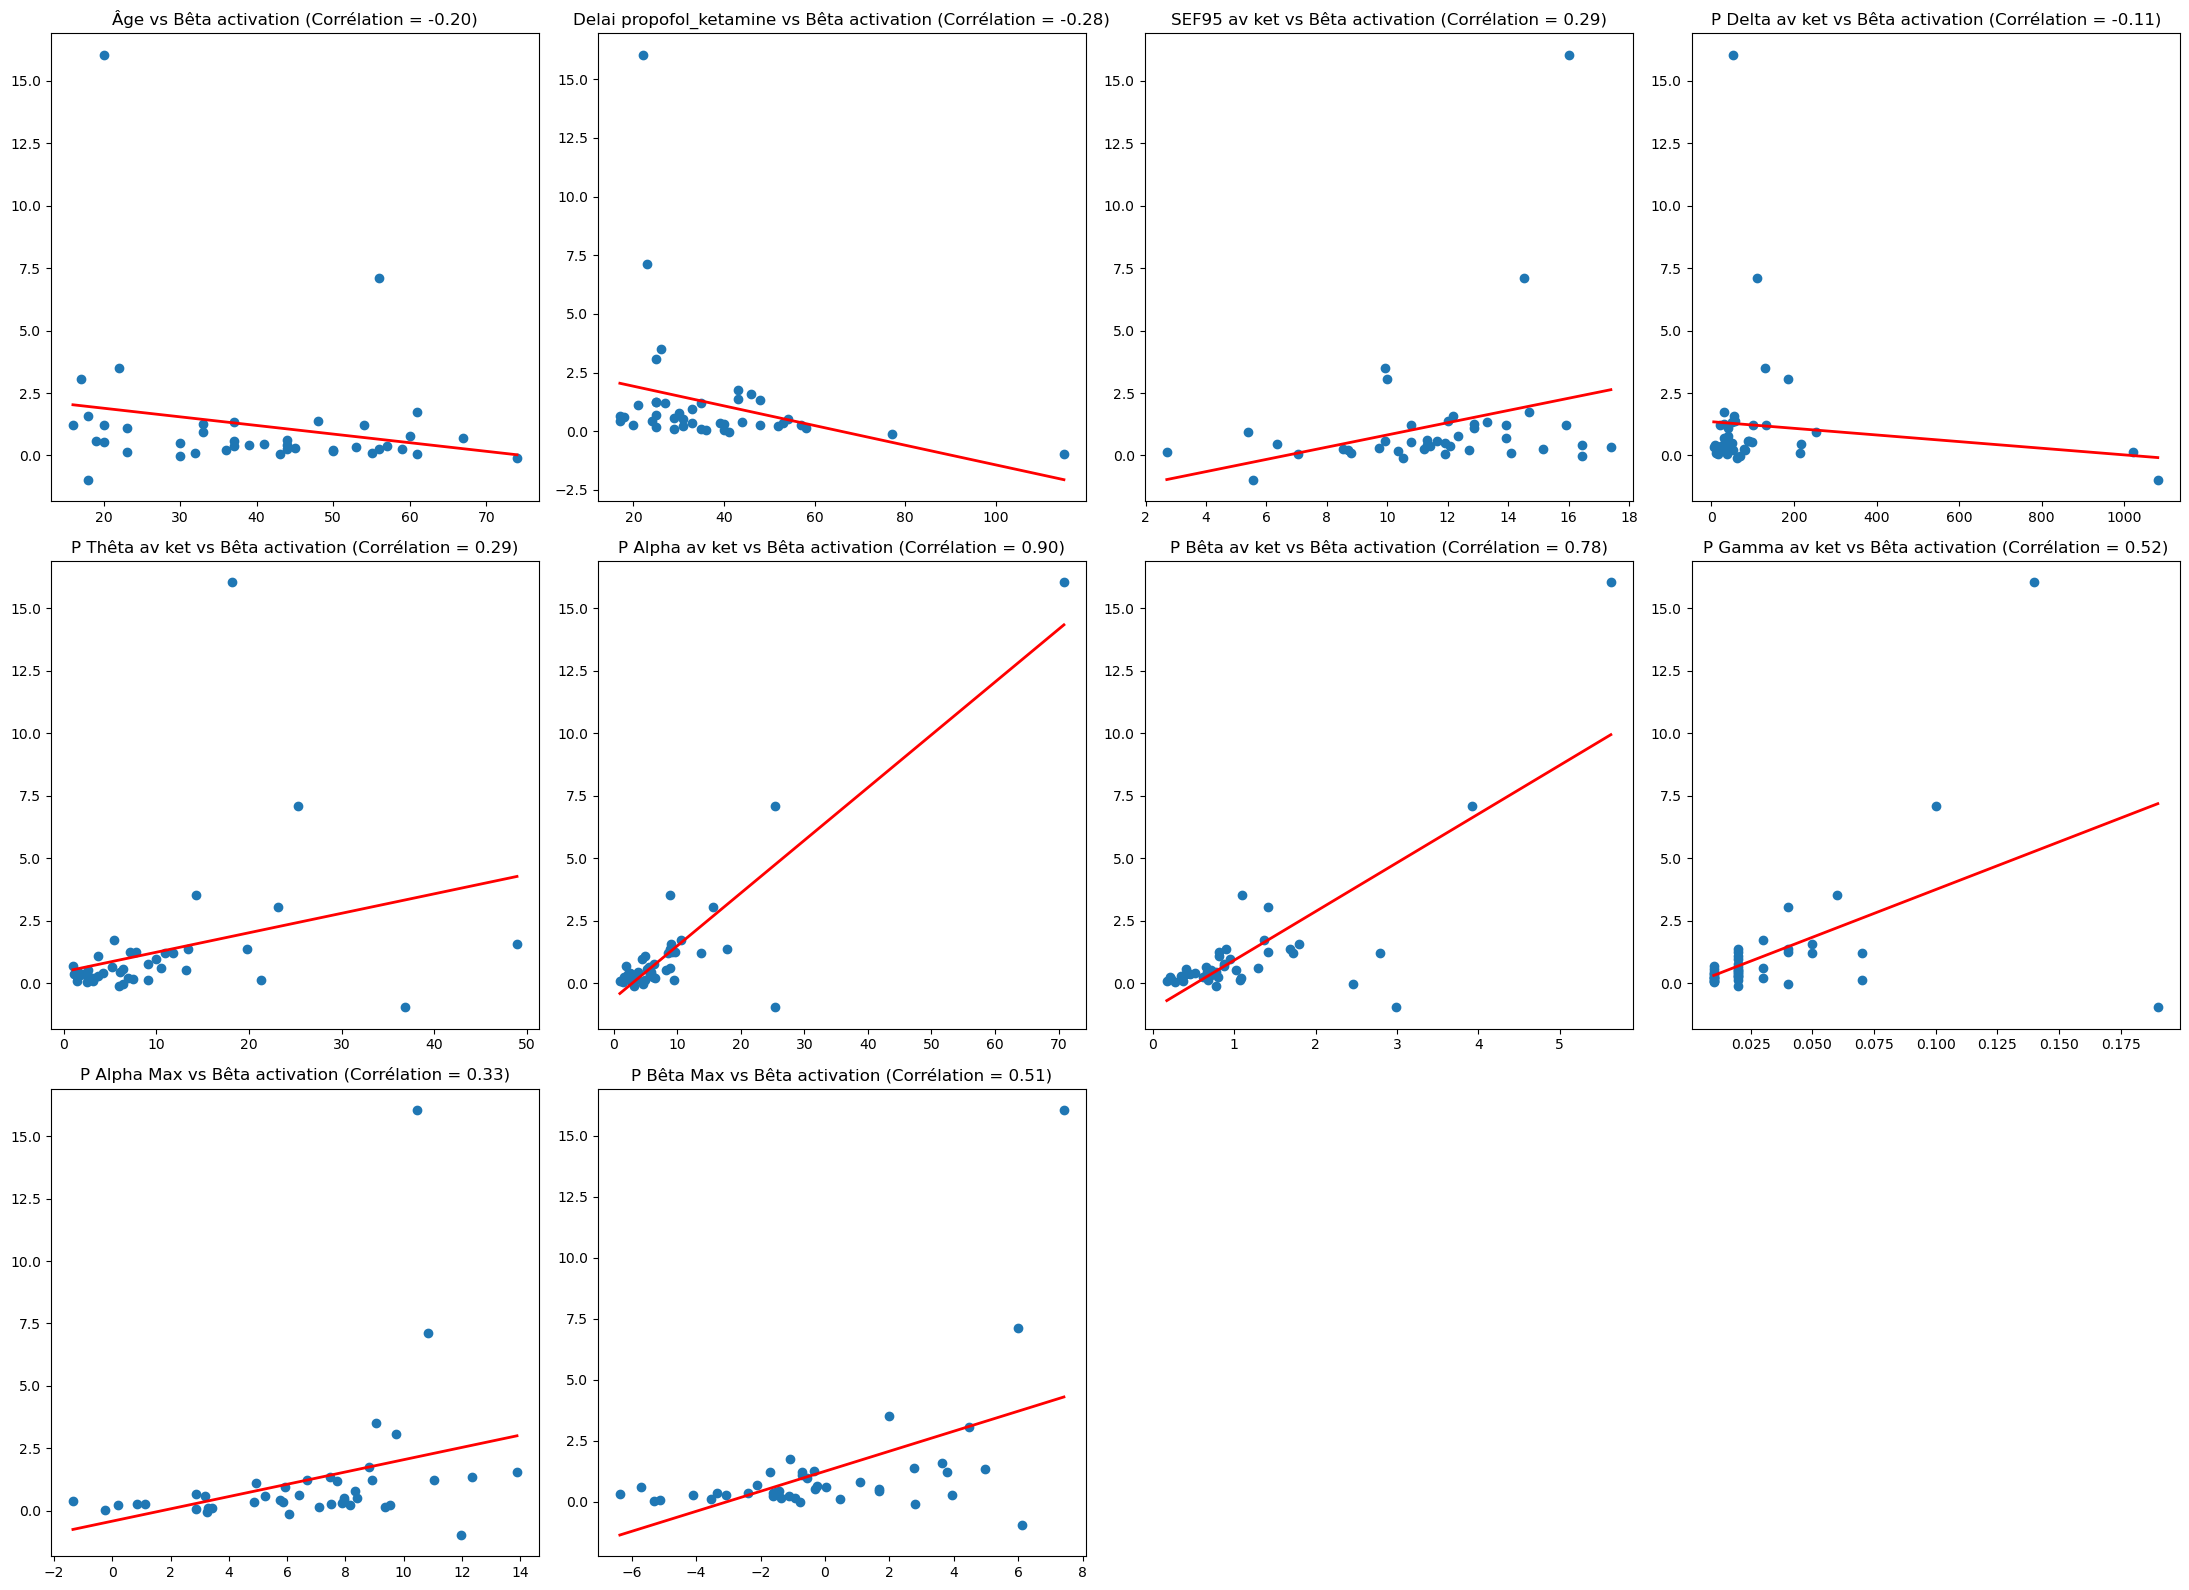

In [825]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Colonne cible 'Bêta activation'
target_column = 'Bêta activation'

# Liste des colonnes indépendantes
independent_columns = ['Âge', 'Delai propofol_ketamine', 'SEF95 av ket', 'P Delta av ket','P Thêta av ket',
                        'P Alpha av ket', 'P Bêta av ket', 'P Gamma av ket', 'P Alpha Max',
                        'P Bêta Max']

# Créez une figure pour les graphiques
plt.figure(figsize=(22, 16))

for i, col in enumerate(independent_columns, start=1):
    # Créez un sous-tracé pour chaque colonne indépendante
    plt.subplot(3, 4, i)
    
    # Nuage de points
    x = recueil_final[col]
    y = recueil_final[target_column]
    plt.scatter(x, y)
    
    # Régression linéaire
    model = LinearRegression()
    X = x.values.reshape(-1, 1)
    model.fit(X, y.values)
    
    # Droite de régression
    x_range = np.linspace(min(x), max(x), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    plt.plot(x_range, y_pred, color='red', linewidth=2)
    
    # Coefficient de corrélation de Pearson
    correlation_coefficient = np.corrcoef(x, y)[0, 1]
    
    # Ajoutez le coefficient de corrélation au titre
    plt.title(f'{col} vs {target_column} (Corrélation = {correlation_coefficient:.2f})')

# Ajustez l'espacement entre les sous-tracés
plt.tight_layout()

# Affichez les graphiques
plt.show()


# AUC

AUC : 0.81


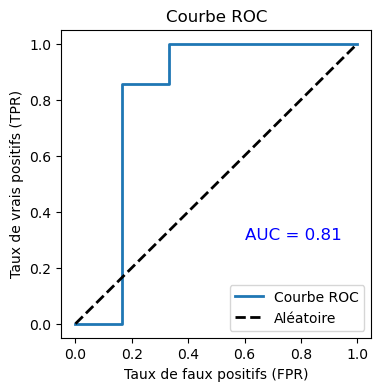

In [835]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


X = recueil_final[['Âge', 'SEF95 av ket', 'P Alpha av ket']]


y = recueil_final["Activation"]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Créer et entraîner un modèle de régression logistique (remplacez cela par votre propre modèle)
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédire les probabilités des classes positives pour les données de test
y_probs = model.predict_proba(X_test)[:, 1]

# Calculer l'AUC
auc = roc_auc_score(y_test, y_probs)
print(f'AUC : {auc:.2f}')

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Tracer la courbe ROC
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, linewidth=2, label='Courbe ROC')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Aléatoire')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()

# Ajouter l'AUC au graphique
plt.annotate(f'AUC = {auc:.2f}', xy=(0.6, 0.4), xytext=(0.6, 0.3),
             fontsize=12, color='blue')


plt.show()

In [830]:
from sklearn.ensemble import RandomForestClassifier

# Créez un modèle de Random Forest
model = RandomForestClassifier(random_state=0)

X = recueil_final[['Âge', 'Delai propofol_ketamine', 'SEF95 av ket', 'P Delta av ket' , 
                   'P Thêta av ket','P Alpha av ket', 'P Bêta av ket', 'P Gamma av ket']]


y = recueil_final["Activation"]

# Entraînez le modèle
model.fit(X, y)

# Obtenez les scores d'importance des variables
feature_importances = model.feature_importances_

# Affichez les scores d'importance pour chaque variable
for i, col in enumerate(X.columns):
    print(f"Variable : {col}, Importance : {feature_importances[i]}")

Variable : Âge, Importance : 0.09420157585677709
Variable : Delai propofol_ketamine, Importance : 0.08548568813649121
Variable : SEF95 av ket, Importance : 0.10112492822058405
Variable : P Delta av ket, Importance : 0.11804747270265067
Variable : P Thêta av ket, Importance : 0.16299368222111535
Variable : P Alpha av ket, Importance : 0.18702843953945172
Variable : P Bêta av ket, Importance : 0.20244468422356923
Variable : P Gamma av ket, Importance : 0.04867352909936073


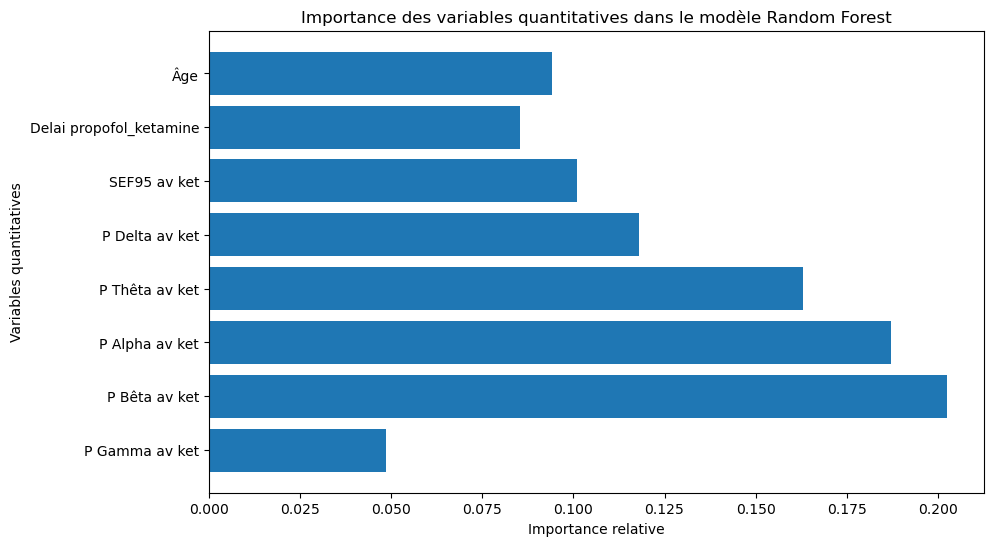

In [696]:
# Obtenez les scores d'importance
feature_importances = model.feature_importances_

# Obtenez les noms des variables quantitatives
quantitative_columns = ['Âge', 'Delai propofol_ketamine', 'SEF95 av ket', 'P Delta av ket' , 
                   'P Thêta av ket','P Alpha av ket', 'P Bêta av ket', 'P Gamma av ket']

# Créez un graphique à barres pour visualiser les importances
plt.figure(figsize=(10, 6))
plt.barh(quantitative_columns, feature_importances)
plt.xlabel('Importance relative')
plt.ylabel('Variables quantitatives')
plt.title('Importance des variables quantitatives dans le modèle Random Forest')
plt.gca().invert_yaxis()  # Inverser l'ordre des variables
plt.show()

# Data P Alpha Bêta Max Curare

In [717]:
data_new = data_merged = pd.read_csv(r"C:\Users\nico_\Desktop\INSERM\nouveau recueil.csv", sep=';', encoding='ISO-8859-1')

In [718]:
data_Pmax = pd.read_csv(r"C:\Users\nico_\Desktop\INSERM\Projet ICEO\puissance alpha max csv.csv", sep=';', encoding='ISO-8859-1')

In [719]:
d = pd.merge(data_new, data_Pmax, on='Patient', how='inner')

In [720]:
data_puissance = pd.read_csv(r"C:\Users\nico_\Desktop\INSERM\Projet ICEO\puissances_SEF95_2_csv.csv", sep=';', encoding='ISO-8859-1')
data_puissance["Delta SEF95"] = data_puissance["SEF95 ap ket"] - data_puissance["SEF95 av ket"]
data_puissance['Delta Delta'] = data_puissance['P Delta ap ket'] - data_puissance['P Delta av ket']
data_puissance['Delta Thêta'] = data_puissance['P Thêta ap ket'] - data_puissance['P Thêta av ket']
data_puissance['Delta Alpha'] = data_puissance['P Alpha ap ket'] - data_puissance['P Alpha av ket']
data_puissance["Bêta activation"] = data_puissance["P Bêta ap ket"] - data_puissance["P Bêta av ket"]      
data_puissance['Delta Gamma'] = data_puissance['P Gamma ap ket'] - data_puissance['P Gamma av ket']

In [721]:
d = pd.merge(data_puissance, d, on='Patient', how='inner')

In [724]:
group_0 = d[d['Curare'] == 0]
group_1 = d[d['Curare'] == 1]

In [725]:
variable_names = ['P Alpha Max', 'P Bêta Max']

for variable_name in variable_names:
    
    _, p_value = stats.shapiro(d[variable_name])
    
    alpha = 0.05
    if p_value > alpha:
        print(f"La variable {variable_name} suit une distribution normale (p-value = {p_value})")
    else:
        print(f"La variable {variable_name} ne suit pas une distribution normale (p-value = {p_value})")


La variable P Alpha Max suit une distribution normale (p-value = 0.6523085832595825)
La variable P Bêta Max suit une distribution normale (p-value = 0.3668573796749115)


In [727]:
alpha = 0.05  

variable_names = ['P Alpha Max', 'P Bêta Max']

for variable_name in variable_names:
    group1 = d[d['Curare'] == 1][variable_name]
    group0 = d[d['Curare'] == 0][variable_name]
    
    
    t_statistic, p_value = stats.ttest_ind(group1, group0)
    
    if p_value < alpha:
        print(f"Le test de Student indique une différence significative pour {variable_name} (p-value = {p_value})")
    else:
        print(f"Le test de Student n'indique pas de différence significative pour {variable_name} (p-value = {p_value})")

Le test de Student n'indique pas de différence significative pour P Alpha Max (p-value = 0.13647784086671114)
Le test de Student n'indique pas de différence significative pour P Bêta Max (p-value = 0.07963803562323031)


<AxesSubplot:ylabel='Density'>

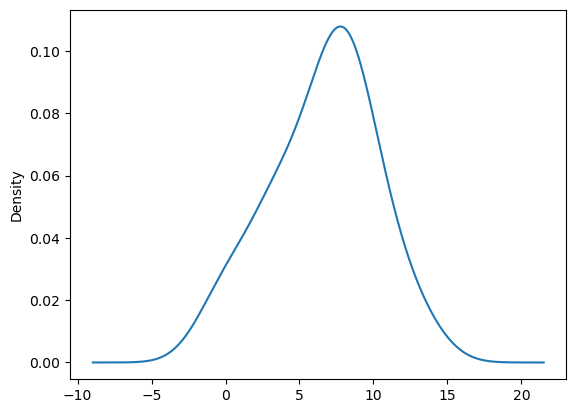

In [735]:
d['P Alpha Max'].plot(kind='density')

In [737]:
from scipy.stats import skew, kurtosis

# Calcul de la skewness
skewness = skew(d['P Alpha Max'])
print(f"Skewness : {skewness}")

# Calcul de la kurtosis
kurt = kurtosis(d['P Alpha Max'])
print(f"Kurtosis : {kurt}")

Skewness : -0.2993879205827368
Kurtosis : -0.43168617000278076


<AxesSubplot:ylabel='Density'>

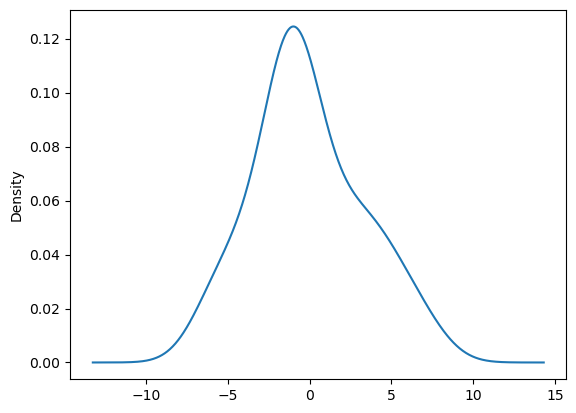

In [738]:
d['P Bêta Max'].plot(kind='density')

In [740]:
# Calcul de la skewness
skewness = skew(d['P Bêta Max'])
print(f"Skewness : {skewness}")

# Calcul de la kurtosis
kurt = kurtosis(d['P Bêta Max'])
print(f"Kurtosis : {kurt}")

Skewness : 0.31905185294861904
Kurtosis : -0.3837446753456861
